## About The Code

 This code comes from a book 'Survival Analysis with Python' 

 The book's [Amazon URL](https://www.amazon.com/Survival-Analysis-Python-Avishek-Nag-ebook/dp/B09LYTWM4M)

 For this dataset there is another analysis can be refer : https://www.kaggle.com/code/aradinka/survival-analysis-veterans-lung-cancer-study/notebook



# Fit Exponential Modle

### Load Data

In [29]:
import pandas as pd

veteran_df = pd.read_csv('../data/veterans_lung_cancer.csv')
veteran_df.head()

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


### Fit expoenetial modle on the dataset

In [30]:
from lifelines import ExponentialFitter

veteran_df_1 = veteran_df[veteran_df.trt == 1]
epf = ExponentialFitter().fit(veteran_df_1['time'], veteran_df_1['status'])

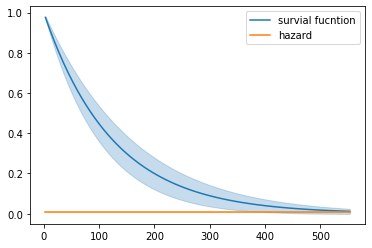

In [31]:
import matplotlib.pyplot as plt

epf.plot_survival_function(label='survial fucntion').legend()
epf.plot_hazard(label='hazard').legend()

# Predicting Survial Probability

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(veteran_df_1)

### Fit and estimate

In [33]:
trained_epf = ExponentialFitter().fit(train['time'], train['status'])
estimated_sp = trained_epf.predict(test['time'])

### Evaluate Performance

In [34]:
import math

def brier_score(actual, estimated):
    n = len(actual)
    error = 0.0 
    for i in range(n):
        error += math.pow(estimated.iloc[i] - actual.iloc[i], 2)
    return error/n

# use in the dataset 1.0 means event happen --- patient died
# here, we predict whether patient will survival
brier_score(test['status'], 1.0 - estimated_sp)


0.36383662440224984

# Weibull distribution

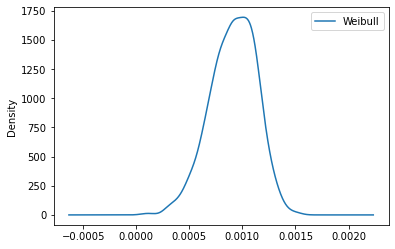

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import weibull_min

shape = 5
scale = 0.001
weibull_sample = weibull_min.rvs(shape, 0, scale, size=1000)

pd.DataFrame(weibull_sample).plot(kind = 'density')
plt.legend(["Weibull"])